In [1]:
import torch 
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.utils.data import DataLoader
from tqdm import tqdm
import datetime
from matplotlib import pyplot as plt

%matplotlib inline
%run ./data_loading.ipynb

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=6, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(in_channels=12, out_channels=12, kernel_size=5, stride=1, padding=0)

        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.fc1 = nn.Linear(in_features=10*10*12, out_features=300)
        self.fc2 = nn.Linear(in_features=300, out_features=60)
        self.fc3 = nn.Linear(in_features=60, out_features=9)
        
    def forward(self, X):
        X = self.relu(self.conv1(X))
        X = self.pool(self.relu(self.conv2(X)))
        X = self.relu(self.conv3(X))
        X = self.pool(self.relu(self.conv4(X)))
        X = X.view(-1, 10*10*12)
        X = self.relu(self.fc1(X))
        X = self.relu(self.fc2(X))
        X = self.fc3(X)
        return X

In [3]:
def calculate_accuracy(dataloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = 100 * correct / total
    return acc

In [4]:
def train(dataset, epochs, batch_size=5, to_cuda=True, calculate_acc=False):
    train_acc = []
    val_acc = []
    if to_cuda:
        dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, pin_memory=True)
    else:
        dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    for epoch in range(epochs):
        running_loss = 0.0
        for i, data in tqdm(enumerate(dataloader, 0)):
            inputs, labels = data
            if to_cuda:
                inputs = inputs.cuda()
                labels = labels.cuda()

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = loss_f(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
        print('epoch:', epoch, ', loss:', running_loss * batch_size / dataloader.__len__())
        if calculate_acc:
            t = calculate_accuracy(dataloader)
            v = calculate_accuracy(val_loader)
            print("train acc:", t, "val acc:", v)
            train_acc.append(t)
            val_acc.append(v)
        if epoch % 1 == 0: # every x epochs reshuffle data by creating a new loader
            if to_cuda:
                dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, pin_memory=True)
            else:
                dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    return train_acc, val_acc

In [13]:
cr_test = ClassroomDataset(range_10=[7,10])
# Dividing data into 50% train, 40% val, 30% test
hyper_scores = {}
for lr in [0.001, 0.01, 0.1]:
    scores = []
    for i in range(2):
        net = Net().float()
        if torch.cuda.is_available():
            net = net.cuda()
        loss_f = nn.CrossEntropyLoss()
        optimizer = optim.SGD(net.parameters(), lr=lr)
        if i == 0:
            cr_train = ClassroomDataset(range_10=[0,5])
            cr_val = ClassroomDataset(range_10=[5,7])
        else:
            cr_train = ClassroomDataset(range_10=[2,7])
            cr_val = ClassroomDataset(range_10=[0,2])
        val_loader = DataLoader(cr_val, batch_size=1, shuffle=True)
        train_accuracy, val_accuracy = train(cr_train, to_cuda=False, epochs=10, calculate_acc=True)
        print(train_accuracy, val_accuracy)
        scores.append((train_accuracy, val_accuracy))
    hyper_scores[lr] = scores

640it [00:04, 128.39it/s]


epoch: 0 , loss: 10.936939114704728
train acc: 12.5625 val acc: 12.734375


640it [00:05, 115.13it/s]


epoch: 1 , loss: 10.894598258659244
train acc: 12.5625 val acc: 12.734375


640it [00:05, 126.71it/s]


epoch: 2 , loss: 10.858221450820565
train acc: 12.5625 val acc: 12.734375


640it [00:08, 80.83it/s]


epoch: 3 , loss: 10.826453670859337
train acc: 12.5625 val acc: 12.734375


640it [00:07, 80.36it/s]


epoch: 4 , loss: 10.798474542796612
train acc: 12.5625 val acc: 12.734375


640it [00:07, 79.00it/s]


epoch: 5 , loss: 10.773852780461311
train acc: 12.5625 val acc: 12.734375


640it [00:07, 80.18it/s]


epoch: 6 , loss: 10.751863783225417
train acc: 12.5625 val acc: 12.734375


640it [00:07, 80.35it/s]


epoch: 7 , loss: 10.731945928186178
train acc: 12.5625 val acc: 12.734375


640it [00:07, 80.89it/s]


epoch: 8 , loss: 10.713805124163628
train acc: 12.5625 val acc: 12.734375


640it [00:07, 80.23it/s]


epoch: 9 , loss: 10.697196802124381
train acc: 12.5625 val acc: 12.734375
[12.5625, 12.5625, 12.5625, 12.5625, 12.5625, 12.5625, 12.5625, 12.5625, 12.5625, 12.5625] [12.734375, 12.734375, 12.734375, 12.734375, 12.734375, 12.734375, 12.734375, 12.734375, 12.734375, 12.734375]


640it [00:08, 79.53it/s]


epoch: 0 , loss: 11.00453520566225
train acc: 12.46875 val acc: 12.578125


640it [00:07, 80.69it/s]


epoch: 1 , loss: 10.950190629810095
train acc: 12.46875 val acc: 12.578125


640it [00:07, 80.64it/s]


epoch: 2 , loss: 10.903671219944954
train acc: 12.46875 val acc: 12.578125


640it [00:08, 79.75it/s]


epoch: 3 , loss: 10.863725228235126
train acc: 12.46875 val acc: 12.578125


640it [00:07, 80.84it/s]


epoch: 4 , loss: 10.828932544216514
train acc: 12.46875 val acc: 12.578125


640it [00:09, 74.97it/s]


epoch: 5 , loss: 10.797410022467375
train acc: 12.46875 val acc: 12.578125


640it [00:09, 65.26it/s]


epoch: 6 , loss: 10.76790601760149
train acc: 12.46875 val acc: 12.578125


640it [00:08, 76.89it/s]


epoch: 7 , loss: 10.739574564620852
train acc: 12.46875 val acc: 12.578125


640it [00:08, 76.88it/s]


epoch: 8 , loss: 10.71204468421638
train acc: 12.78125 val acc: 12.8125


640it [00:08, 79.32it/s]


epoch: 9 , loss: 10.684033803641796
train acc: 12.59375 val acc: 12.34375
[12.46875, 12.46875, 12.46875, 12.46875, 12.46875, 12.46875, 12.46875, 12.46875, 12.78125, 12.59375] [12.578125, 12.578125, 12.578125, 12.578125, 12.578125, 12.578125, 12.578125, 12.578125, 12.8125, 12.34375]


640it [00:07, 80.09it/s]


epoch: 0 , loss: 10.758614208549261
train acc: 12.46875 val acc: 12.34375


640it [00:08, 78.20it/s]


epoch: 1 , loss: 10.486973159015179
train acc: 12.5 val acc: 12.34375


640it [00:08, 81.12it/s]


epoch: 2 , loss: 10.319086730480194
train acc: 44.4375 val acc: 43.671875


640it [00:08, 75.04it/s]


epoch: 3 , loss: 4.600680312461918
train acc: 80.3125 val acc: 80.859375


640it [00:08, 79.93it/s]


epoch: 4 , loss: 2.9277370197069104
train acc: 82.8125 val acc: 80.78125


640it [00:07, 80.55it/s]


epoch: 5 , loss: 2.2399730228207773
train acc: 89.8125 val acc: 85.78125


640it [00:08, 79.90it/s]


epoch: 6 , loss: 1.6895092766742437
train acc: 92.25 val acc: 88.359375


640it [00:08, 77.87it/s]


epoch: 7 , loss: 1.267578426307466
train acc: 89.9375 val acc: 84.6875


640it [00:07, 80.30it/s]


epoch: 8 , loss: 0.974586836549804
train acc: 96.125 val acc: 90.546875


640it [00:07, 80.22it/s]


epoch: 9 , loss: 0.6415195902488247
train acc: 97.71875 val acc: 91.328125
[12.46875, 12.5, 44.4375, 80.3125, 82.8125, 89.8125, 92.25, 89.9375, 96.125, 97.71875] [12.34375, 12.34375, 43.671875, 80.859375, 80.78125, 85.78125, 88.359375, 84.6875, 90.546875, 91.328125]


640it [00:08, 78.86it/s]


epoch: 0 , loss: 10.816313337534666
train acc: 12.53125 val acc: 12.34375


640it [00:07, 80.18it/s]


epoch: 1 , loss: 8.798815577640198
train acc: 75.15625 val acc: 74.609375


640it [00:07, 80.79it/s]


epoch: 2 , loss: 3.7755326678598067
train acc: 78.84375 val acc: 77.421875


640it [00:08, 77.50it/s]


epoch: 3 , loss: 2.5759705447476335
train acc: 86.8125 val acc: 84.21875


640it [00:07, 81.37it/s]


epoch: 4 , loss: 1.9632942435700045
train acc: 90.5 val acc: 86.40625


640it [00:07, 82.03it/s]


epoch: 5 , loss: 1.4521825336913707
train acc: 93.6875 val acc: 89.140625


640it [00:07, 81.66it/s]


epoch: 6 , loss: 1.0058421764520453
train acc: 92.75 val acc: 87.96875


640it [00:08, 79.95it/s]


epoch: 7 , loss: 0.8737647979431706
train acc: 95.375 val acc: 89.296875


640it [00:07, 81.77it/s]


epoch: 8 , loss: 0.7269376106228638
train acc: 95.78125 val acc: 90.078125


640it [00:07, 81.91it/s]


epoch: 9 , loss: 0.5436458301740954
train acc: 98.09375 val acc: 91.640625
[12.53125, 75.15625, 78.84375, 86.8125, 90.5, 93.6875, 92.75, 95.375, 95.78125, 98.09375] [12.34375, 74.609375, 77.421875, 84.21875, 86.40625, 89.140625, 87.96875, 89.296875, 90.078125, 91.640625]


640it [00:07, 82.41it/s]


epoch: 0 , loss: 10.5678408164531
train acc: 12.5 val acc: 12.34375


640it [00:07, 81.24it/s]


epoch: 1 , loss: 10.46844582632184
train acc: 12.6875 val acc: 12.109375


640it [00:07, 82.15it/s]


epoch: 2 , loss: 10.108172392472625
train acc: 50.6875 val acc: 47.96875


640it [00:07, 81.14it/s]


epoch: 3 , loss: 10.151427406817675
train acc: 12.5625 val acc: 12.34375


640it [00:07, 81.38it/s]


epoch: 4 , loss: 10.457183129154146
train acc: 12.6875 val acc: 12.109375


640it [00:07, 81.35it/s]


epoch: 5 , loss: 10.447489686310291
train acc: 12.5625 val acc: 12.65625


640it [00:07, 81.27it/s]


epoch: 6 , loss: 10.44774116948247
train acc: 12.5625 val acc: 12.65625


640it [00:07, 82.74it/s]


epoch: 7 , loss: 10.434365464374423
train acc: 12.5625 val acc: 12.65625


640it [00:07, 82.21it/s]


epoch: 8 , loss: 10.42984100151807
train acc: 12.46875 val acc: 12.34375


640it [00:07, 81.29it/s]


epoch: 9 , loss: 10.43493536580354
train acc: 12.5625 val acc: 12.65625
[12.5, 12.6875, 50.6875, 12.5625, 12.6875, 12.5625, 12.5625, 12.5625, 12.46875, 12.5625] [12.34375, 12.109375, 47.96875, 12.34375, 12.109375, 12.65625, 12.65625, 12.65625, 12.34375, 12.65625]


640it [00:07, 83.61it/s]


epoch: 0 , loss: 10.26892583630979
train acc: 53.0625 val acc: 53.671875


640it [00:07, 81.45it/s]


epoch: 1 , loss: 4.684766644910269
train acc: 82.65625 val acc: 80.9375


640it [00:07, 81.29it/s]


epoch: 2 , loss: 2.116682803737149
train acc: 88.125 val acc: 86.25


640it [00:07, 81.52it/s]


epoch: 3 , loss: 1.2230716355885534
train acc: 92.46875 val acc: 89.140625


640it [00:07, 83.99it/s]


epoch: 4 , loss: 0.7532425080590752
train acc: 97.03125 val acc: 93.125


640it [00:07, 83.31it/s]


epoch: 5 , loss: 0.9901530989579633
train acc: 94.78125 val acc: 89.296875


640it [00:07, 82.85it/s]


epoch: 6 , loss: 0.68788201634176
train acc: 96.78125 val acc: 89.0625


640it [00:07, 83.50it/s]


epoch: 7 , loss: 2.640354682859974
train acc: 12.65625 val acc: 12.5


640it [00:07, 83.56it/s]


epoch: 8 , loss: 10.4986373456195
train acc: 12.53125 val acc: 12.34375


640it [00:07, 83.57it/s]


epoch: 9 , loss: 10.464691502042115
train acc: 12.40625 val acc: 13.046875
[53.0625, 82.65625, 88.125, 92.46875, 97.03125, 94.78125, 96.78125, 12.65625, 12.53125, 12.40625] [53.671875, 80.9375, 86.25, 89.140625, 93.125, 89.296875, 89.0625, 12.5, 12.34375, 13.046875]


In [14]:
hyper_scores

{0.001: [([12.5625,
    12.5625,
    12.5625,
    12.5625,
    12.5625,
    12.5625,
    12.5625,
    12.5625,
    12.5625,
    12.5625],
   [12.734375,
    12.734375,
    12.734375,
    12.734375,
    12.734375,
    12.734375,
    12.734375,
    12.734375,
    12.734375,
    12.734375]),
  ([12.46875,
    12.46875,
    12.46875,
    12.46875,
    12.46875,
    12.46875,
    12.46875,
    12.46875,
    12.78125,
    12.59375],
   [12.578125,
    12.578125,
    12.578125,
    12.578125,
    12.578125,
    12.578125,
    12.578125,
    12.578125,
    12.8125,
    12.34375])],
 0.01: [([12.46875,
    12.5,
    44.4375,
    80.3125,
    82.8125,
    89.8125,
    92.25,
    89.9375,
    96.125,
    97.71875],
   [12.34375,
    12.34375,
    43.671875,
    80.859375,
    80.78125,
    85.78125,
    88.359375,
    84.6875,
    90.546875,
    91.328125]),
  ([12.53125,
    75.15625,
    78.84375,
    86.8125,
    90.5,
    93.6875,
    92.75,
    95.375,
    95.78125,
    98.09375],
   [12.343

In [16]:
lines = {}
for hp in hyper_scores:
    scores = hyper_scores[hp]
    fold_1 = scores[0]
    fold_2 = scores[1]
    val_1 = fold_1[1]
    val_2 = fold_2[1]
    val = np.mean([val_1, val_2], axis=0)
    print(hp)
    print(val)
    lines[hp] = val

0.001
[12.65625   12.65625   12.65625   12.65625   12.65625   12.65625
 12.65625   12.65625   12.7734375 12.5390625]
0.01
[12.34375   43.4765625 60.546875  82.5390625 83.59375   87.4609375
 88.1640625 86.9921875 90.3125    91.484375 ]
0.1
[33.0078125 46.5234375 67.109375  50.7421875 52.6171875 50.9765625
 50.859375  12.578125  12.34375   12.8515625]


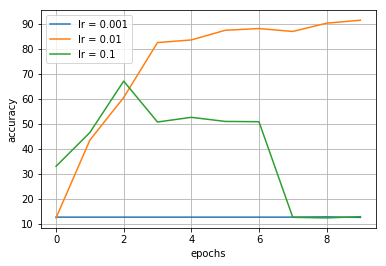

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
epochs = np.arange(len(list(lines.values())[0]))

ax.plot(epochs, lines[0.001], label="lr = 0.001")
ax.plot(epochs, lines[0.01], label="lr = 0.01")
ax.plot(epochs, lines[0.1], label="lr = 0.1")
ax.grid()
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')
# ax.set_facecolor('lightgray')
# ax.spines['bottom'].set_color('white')
# ax.spines['top'].set_color('white')
# ax.xaxis.label.set_color('white')
# ax.tick_params(axis='x', colors='white')
# ax.tick_params(axis='y', colors='white')
ax.legend()